# 作业1

In [1]:
data = [
    {'year': '1991', 'value': 3},
    {'year': '1992', 'value': 4},
    {'year': '1993', 'value': 3.5},
    {'year': '1994', 'value': 5},
    {'year': '1995', 'value': 4.9},
    {'year': '1996', 'value': 6},
    {'year': '1997', 'value': 7},
    {'year': '1998', 'value': 9},
    {'year': '1999', 'value': 13},
]

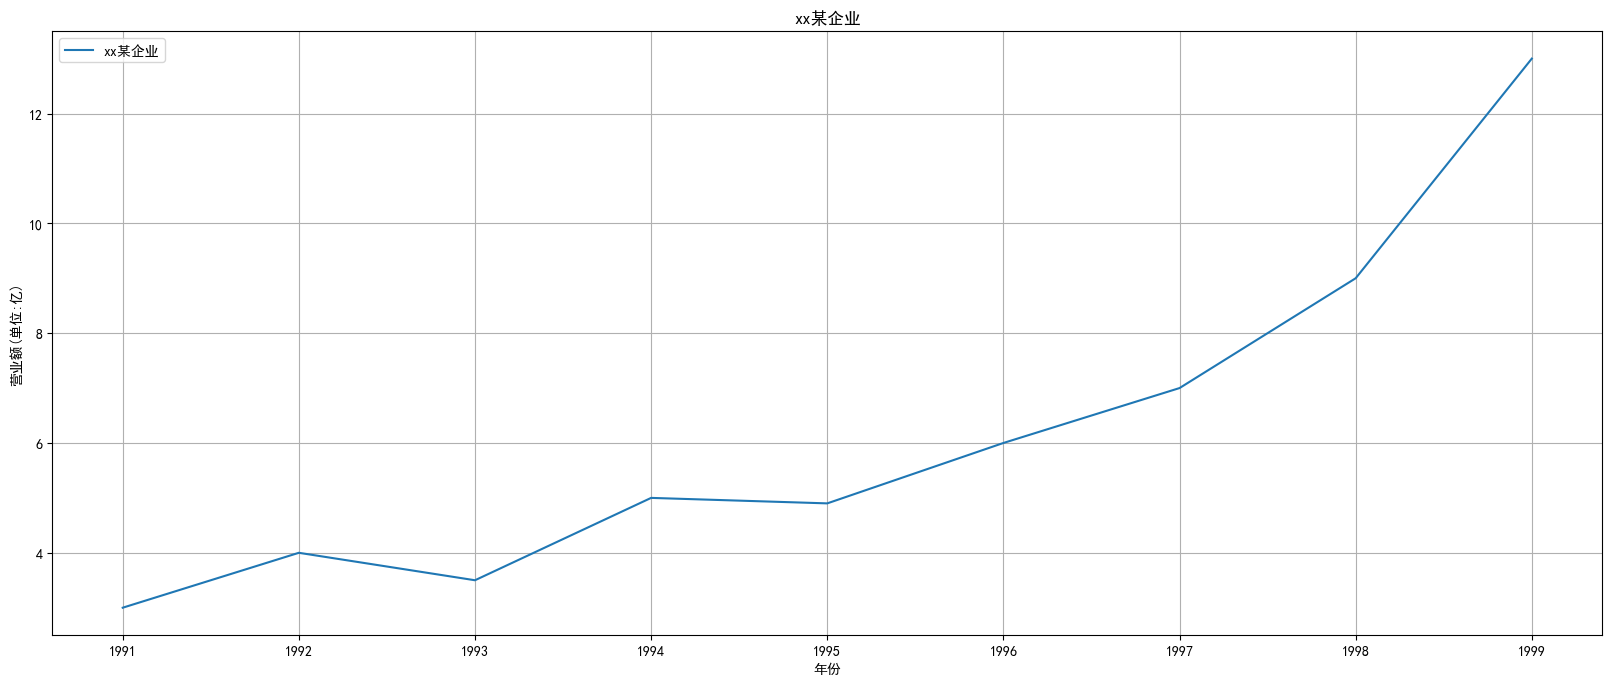

In [12]:
import matplotlib.pyplot as plt

plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False

x = [item['year'] for item in data]
x
y= [item['value'] for item in data]
y

plt.figure(figsize=(20, 8), dpi=100)
plt.plot(x, y, label='xx某企业')
plt.legend()

plt.title('xx某企业')
plt.xlabel('年份')
plt.ylabel('营业额(单位:亿)')
plt.grid()


# 作业2

In [20]:
# 读取数据
import json

data = json.loads(open('goods.json', mode='r', encoding='utf-8').read())
data

# 构建数据
x_ticket = [item['city'] for item in data][::4]
x_ticket

y_data = {}

for d in data:
    if d['city'] not in y_data:
        y_data[d['city']] = [d['value']]
    else:
        y_data[d['city']].append(d['value'])
y_data

{'石家庄': [14500, 8500, 10000, 7000],
 '深圳': [9000, 8500, 11000, 6000],
 '温州': [16000, 5000, 6000, 10000],
 '宁波': [14000, 9000, 10000, 9000],
 '无锡': [14000, 9000, 10000, 6000],
 '杭州': [9000, 8500, 10000, 6000],
 '北京': [17000, 6000, 7000, 10000],
 '上海': [18000, 11000, 15000, 14000]}

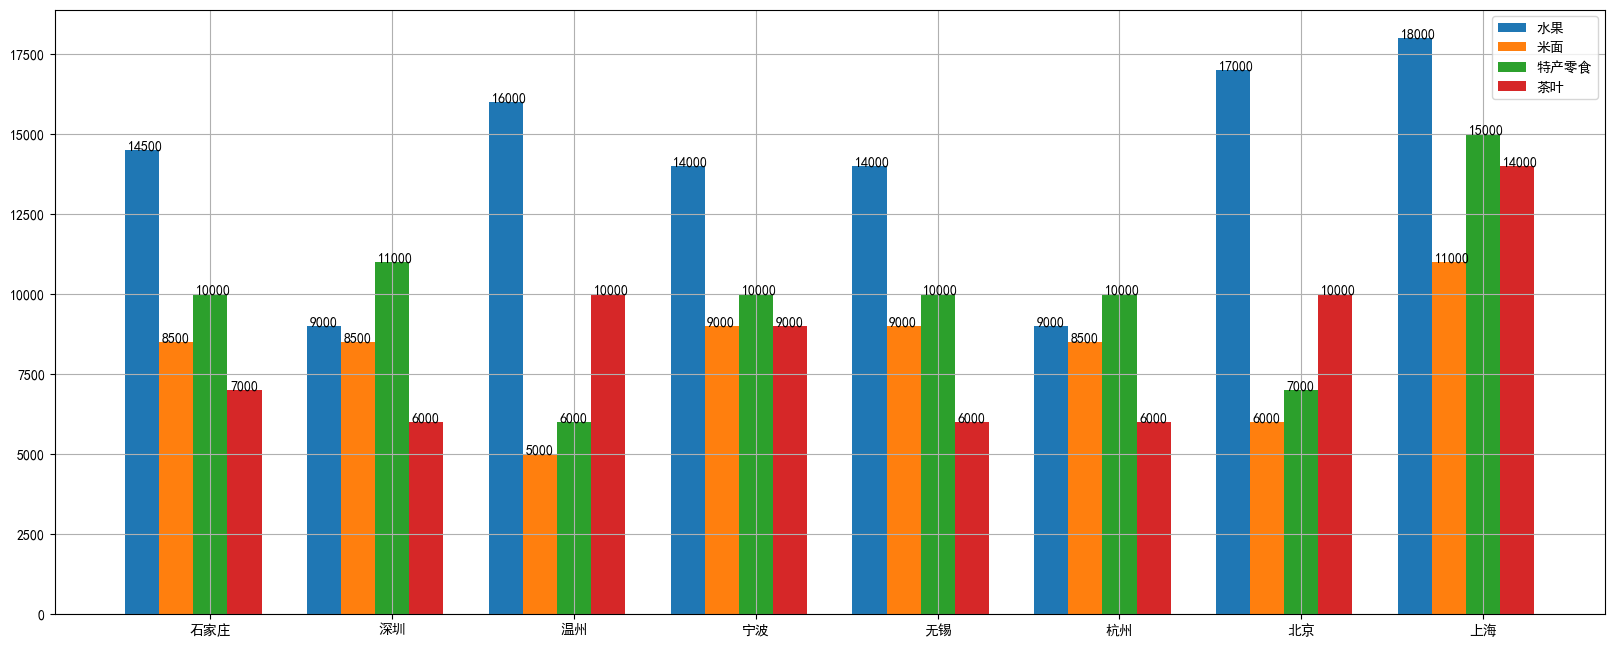

In [27]:
"""构建每一天数据"""
goods_data = list(y_data.values())

every_day = []
for i in range(len(goods_data[0])):
    every_day.append([
        goods_data[0][i],
        goods_data[1][i],
        goods_data[2][i],
        goods_data[3][i],
        goods_data[4][i],
        goods_data[5][i],
        goods_data[6][i],
        goods_data[7][i],
    ])

"""图表绘制"""
plt.figure(figsize=(20, 8), dpi=100)
# 指定柱子的宽度
width = 0.75  # 每一个大柱子的宽度
bin_width = width/4  # 每一个小柱子的宽度

# 生成电影数据的索引
index = range(len(y_data))  # 01234567

# # 绘制第一天的数据
# plt.bar([i - bin_width * 2 for i in index], every_day[0], width=bin_width, label='第一天')

# day_tiket = every_day[0]
# # 往柱子上面添加数据需要循环一个一个加
# xs = [i - bin_width * 2 for i in index]

# for x , ticket in zip(xs, day_tiket):             # x - 0.08 往左移动一点
#                                                   # ticket + 0.05  往上移动一点
#     plt.annotate(ticket, xy=(x , ticket), xytext=(x - 0.08, ticket + 0.05))

# 第二种方案
kinds_list = ['水果', '米面', '特产零食', '茶叶']
for ind in range(len(every_day)):
    # 遍历每一天的数据
    day_tickets = every_day[ind]
    # 构建 x 位置的索引
    xs = [i - (bin_width * (2 - ind)) for i in index]
    # 绘制柱状图
    plt.bar(xs, day_tickets, width=bin_width, label=f"{kinds_list[ind]}")

    # 添加坐标上的数字
    # 需要一个个绘制数据
    for ticket, x in zip(day_tickets, xs):
        # ticket 2.01 每一天的数据
        # 1 - 2 * bin_width
        plt.annotate(ticket, xy=(x, ticket), xytext=(x - 0.08, ticket + 0.1))
    
plt.xticks(index, y_data.keys())
plt.legend()
plt.grid()

plt.savefig('作业.png')

In [24]:
data

[{'city': '石家庄', 'type': '水果', 'value': 14500},
 {'city': '石家庄', 'type': '米面', 'value': 8500},
 {'city': '石家庄', 'type': '特产零食', 'value': 10000},
 {'city': '石家庄', 'type': '茶叶', 'value': 7000},
 {'city': '深圳', 'type': '水果', 'value': 9000},
 {'city': '深圳', 'type': '米面', 'value': 8500},
 {'city': '深圳', 'type': '特产零食', 'value': 11000},
 {'city': '深圳', 'type': '茶叶', 'value': 6000},
 {'city': '温州', 'type': '水果', 'value': 16000},
 {'city': '温州', 'type': '米面', 'value': 5000},
 {'city': '温州', 'type': '特产零食', 'value': 6000},
 {'city': '温州', 'type': '茶叶', 'value': 10000},
 {'city': '宁波', 'type': '水果', 'value': 14000},
 {'city': '宁波', 'type': '米面', 'value': 9000},
 {'city': '宁波', 'type': '特产零食', 'value': 10000},
 {'city': '宁波', 'type': '茶叶', 'value': 9000},
 {'city': '无锡', 'type': '水果', 'value': 14000},
 {'city': '无锡', 'type': '米面', 'value': 9000},
 {'city': '无锡', 'type': '特产零食', 'value': 10000},
 {'city': '无锡', 'type': '茶叶', 'value': 6000},
 {'city': '杭州', 'type': '水果', 'value': 9000},
 {'city': '

<BarContainer object of 8 artists>

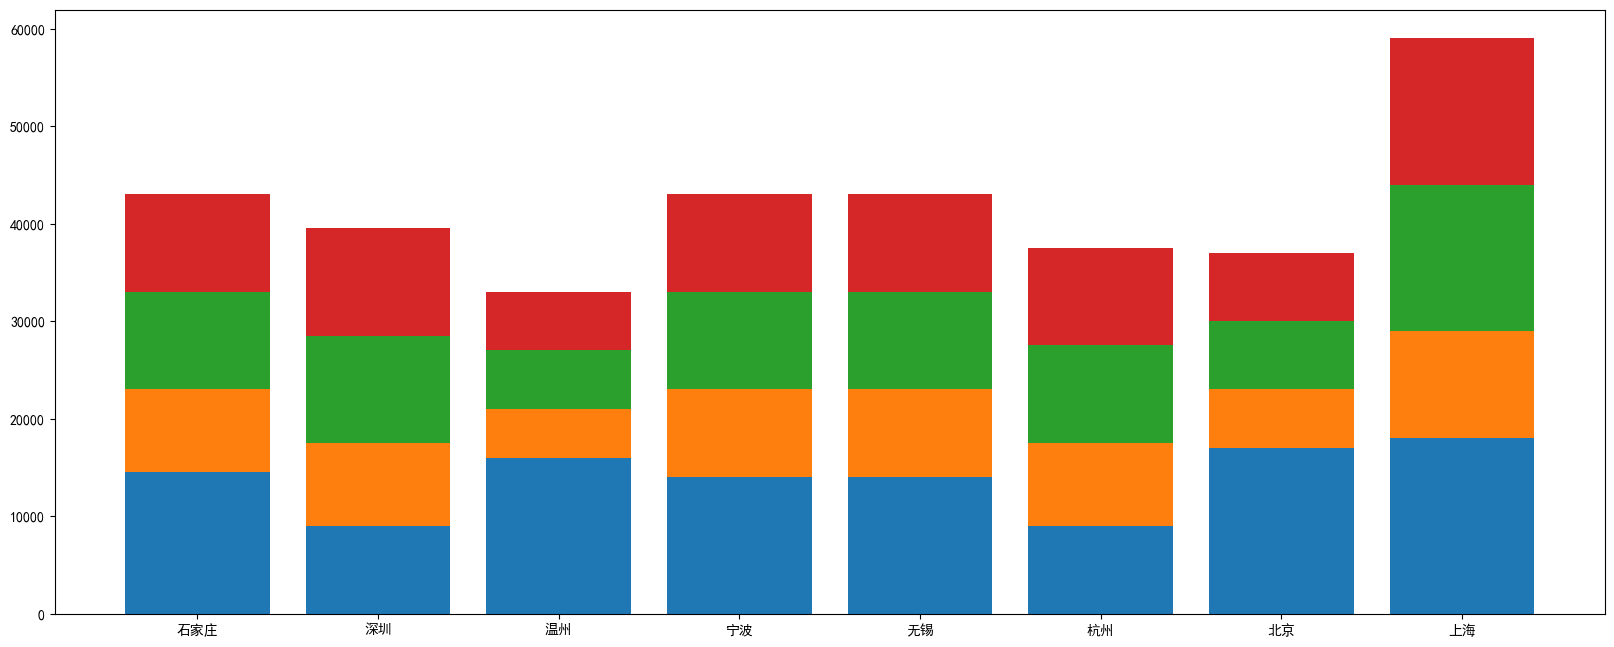

In [40]:
"""堆叠图"""
plt.figure(figsize=(20, 8), dpi=100)

bottom_3 = []
bottom_4 = []

for i in range(len(every_day[0])):
    bottom_3.append(every_day[0][i] + every_day[1][i])
    bottom_4.append(every_day[0][i] + every_day[1][i] + every_day[2][i])


plt.bar(x_ticket, every_day[0], label='水果')
plt.bar(x_ticket, every_day[2], label='米面', bottom=every_day[0])
plt.bar(x_ticket, every_day[2], label='特产零食', bottom=bottom_3)
plt.bar(x_ticket, every_day[2], label='茶叶', bottom=bottom_4)

In [35]:
every_day

[[14500, 9000, 16000, 14000, 14000, 9000, 17000, 18000],
 [8500, 8500, 5000, 9000, 9000, 8500, 6000, 11000],
 [10000, 11000, 6000, 10000, 10000, 10000, 7000, 15000],
 [7000, 6000, 10000, 9000, 6000, 6000, 10000, 14000]]

In [37]:
bottom_3

[23000, 17500, 21000, 23000, 23000, 17500, 23000, 29000]

In [38]:
bottom_4

[33000, 28500, 27000, 33000, 33000, 27500, 30000, 44000]